## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo IV - Estratégias de Treinamento e Transferência de Aprendizado</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---


### Questão 1)

Qual a relação entre viés indutivo de algoritmos de aprendizado e redes contendo muitas camadas e muitas unidades de processamento em cada camada?

(a) Quanto mais profundas e com mais neurônios, melhor permitem memorizar todos os exemplos de treinamento, tornando-as hábeis para generalizar para dados futuros.<br>
<font color='red'>(b) Quanto mais profundas e com mais neurônios, ampliam o espaço de funções admissíveis e assim possuem viés indutivo mais fraco</font><br>
(c) Quanto mais profundas e com mais neurônios, seus resultados estarão mais próximos do estado-da-arte em muitas aplicações permitindo colocá-las em produção.<br>
(d) Quanto mais profundas e com mais neurônios, reduzem o espaço de funções admissíveis e assim possuem viés indutivo mais forte.<br>

Espaço profundo, com muitas funções admissíveis => redes com muitas camadas e muitas unidades em cada camada => viés fraco

Espaço restrito, com 1 ou poucas fçs admissíveis => percéptron 1 neurônio p.e. => viés forte

---

### Questão 2)

Considere os seguintes efeitos no treinamento de redes neurais:

I - Minimizar overfitting<br>
II - Reduzir o número de iterações necessárias para convergência do modelo<br>
III - Evitar o desaparecimento do gradiente<br>
IV - Tornar o modelo treinado mais robusto a ataques<br>

Quais desses estão associados ao uso em conjunto de métodos de regularização e aumento de dados?

(a) I, II e III <br>
(b) II e III<br>
<font color='red'>(c) I e IV </font><br>
(d) I, III e IV<br>



**Métodos de regularização:** minimizam a chance de overfitting, facilitam o processo de convergência, diminui o risco do desaparecimento do gradiente (vanishing gradient), mas não necessariamente acelera o processo.

Ao aplicar um procedimento que *acelera* a convergência podemos considerar diminuir o número de iterações. A consideração que posso fazer é que algumas regularizações como Dropout não *aceleram* o processo de convergência mas fazem com que a convergência seja *melhor*, nesse caso específico, ao aplicar Dropout nós estamos deixando o problema de otimização mais difícil (afinal os neurônios são desligados aleatoriamente) com o intuito de evitar overfitting e a memorização; isso pode fazer com que o processo demore até mais pra convergir, mas teremos mais segurança de um resultado melhor.

Outros tipos de procedimentos, como utilizar do momento na otimização (em conjunto com o algoritmo de Gradiente Descendente Estocástico por exemplo) ou outro algoritmo otimizador como Adam, tem por objetivo a aceleração do processo mesmo, e nesse caso você deve sim considerar diminuir o número de iterações. Sempre leve em conta como foi ou está sendo seu processo de treinamento, a visualização das curvas de custo no treino e validação são essenciais para lhe informar quando seria o momento ideal para parar o treinamento. Além do processo manual você pode também considerar algoritmos de Parada Precoce (Early Stopping), que analisam as mudanças na função de custo e decidem quando parar o treinamento por você.

A regularização e normalização tornam o processo de otimização melhor e mais estável, mas não necessariamente mais rápido, de fato a maior parte das regularizações tornam mais difícil o problema.
Efeitos que podem ser visualizados dessa "facilitação" é nas curvas do custo computadas no treinamento e num conjunto de validação. Ao usar normalização e regularização tende-se a observar:
- uma curva com o valor de custo fica mais "suave" e com formato mais próximo a uma exponencial decrescente
- uma curva de validação mais estável e mais próxima à de treinamento

    
**Aumento de dados:** minimiza a chance de overfitting, facilita a generalização, mas não o processo de convergência.

Sabemos pela Lei dos Grandes Números que quanto maior a amostra disponível, melhor nos aproximamos do valor esperado da variável sendo estudada. O efeito é que aumentamos a garantia teórica de aprendizado. Nesse sentido, quanto mais dados tivermos, menos dependente estamos da regularização e menos sujeitos a ter que parar o treinamento de forma precoce. Também é um método para minimizar overfitting pois durante o processo de treinamento com muitos dados, a rede neural é exposta a uma variedade maior de padrões, tornando mais difícil que essa memorize o conjunto de treinamento. Como ressalva super importante: o aumento de dados de forma artificial/sintética tem limitações no que podemos ganhar ao utilizar essa técnica.


---
### Questão 3)

A normalização de batch, camada ou instância empregadas no projeto de redes neurais profundas tem como principal efeito:

 (a) Tornar mais forte o viés indutivo dos modelos<br>
 (b) Aumentar a variabilidade no conjunto de treinamento permitindo maior robustez a ataques<br>
 (c) Acelerar o processo de treinamento do modelo<br>
<font color='red'> (d) Reduzir problemas com a magnitude do gradiente ao longo das camadas</font><br>

Objetivo: facilitar otimização ao normalizar/padronizar a magnitude dos valores utilizados no treinamento: <br>
. suaviza as ativações dos neurônios, reduzindo a variância do gradiente;<br>
. ataca o problema de "desaparecimento" do gradiente (vanishing gradient) em particular para redes profundas.<br>

---

### Questão 4)

Carregue a base de dados Fashion MNIST conforme código abaixo e crie um modelo de CNN com a seguinte arquitetura, capaz de obter classificação nessa base de dados de imagens. Considere que todas as camadas convolucionais tem zeropadding, e ativação relu, exceto quando mencionado contrário.

1. Pré-processamento para aumentação contendo:
  * RandomZoom(0.1),
  * RandomContrast(0.25),
  * RandomFlip("horizontal")
1. Convolucional 2D com 128 filtros $3\times 3$.
2. MaxPooling2D $2\times 2$ e strides $2$
2. Batch Normalization
3. SeparableConv2D com 256 filtros $3\times 3$.
4. MaxPooling2D $2\times 2$ e strides $2$
5. Batch Normalization
6. SeparableConv2D com 256 filtros $3\times 3$.
7. MaxPooling2D $2\times 2$ e strides $2$
8. GlobalAveragePooling
9. Dropout de 0.33
10. Densa com ativação softmax

Realize 4 experimentos de treinamento, incializando as sementes do numpy e tensorflow para os valores: 1, 3, 5 e 7. Em cada uma, treine o modelo utilizando as primeiras 6 mil imagens (use [:6000]) por 10 épocas com batch size 16, otimizador Adam e taxa de aprendizado 0.0008. Em cada experimento, avalie o resultado da acurácia no conjunto de testes completo. A acurácia média considerando as 4 execuções recai em qual intervalo?

(a) [45,49]<br>
(b) [56,60]<br>
(c) [74,78]<br>
<font color='red'>(d) [82,86]</font><br>

Dataset FASHION_MNIST usado na lista de exercícios 10 - Aula 3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# dividir por 255 para obter normalizacao
train_images = train_images / 255.0
test_images = test_images / 255.0

# transformar categorias em one-hot-encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

### dados a utilizar nos experimentos
no_images = 6000
train_sub = train_images[:no_images]
labels_sub= train_labels[:no_images]

In [38]:
train_sub.shape

(6000, 28, 28)

In [39]:
input_shape = train_sub.shape[1:] + (1,)
input_shape

(28, 28, 1)

In [40]:
labels_sub.shape

(6000, 10)

In [41]:
num_classes = labels_sub.shape[1]
num_classes

10

Arquitetura para a classificação de imagens

Todas as camadas convolucionais tem zeropadding, e ativação relu, exceto quando mencionado contrário <br>
Zeropadding: adição de zeros às linhas e colunas externas à matriz para manter o formato original após o filtro de convolução. <br>

Pré-processamento para aumentação contendo: RandomZoom(0.1), RandomContrast(0.25), RandomFlip("horizontal")  <br>
Convolucional 2D com 128 filtros  3×3 <br>
MaxPooling2D  2×2  e strides  2 <br>
Batch Normalization <br>
SeparableConv2D com 256 filtros  3×3 <br>
MaxPooling2D  2×2  e strides  2  <br>
Batch Normalization <br>
SeparableConv2D com 256 filtros  3×3 <br>
MaxPooling2D  2×2  e strides  2  <br>
GlobalAveragePooling <br>
Dropout de 0.33 <br>
Densa com ativação softmax <br>

In [18]:
camada_aumento = keras.Sequential(
     [
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(0.25),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
    ])

In [23]:
# def mycnn(neurons, layers):
def mycnn(input_shape, num_classes):
    inp = layers.Input(shape=input_shape)
    aum = camada_aumento(inp)
    conv1 = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation="relu")(aum)
    maxp1 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same")(conv1)            
    bn1 = layers.BatchNormalization()(maxp1)
    sep1 = layers.SeparableConv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(bn1)
    maxp2 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same")(sep1)
    bn2 = layers.BatchNormalization()(maxp2)
    sep2 = layers.SeparableConv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(bn2)
    maxp3 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same")(sep2)
    gpol = layers.GlobalAveragePooling2D()(maxp3)
    drop = layers.Dropout(0.33)(gpol)
    out = layers.Dense(num_classes, activation="softmax")(drop)
    cnn = keras.Model(inp, out)
    return cnn

Realize 4 experimentos de treinamento, incializando as sementes do numpy e tensorflow para os valores: 1, 3, 5 e 7. <br>
Em cada uma, treine o modelo utilizando as primeiras 6 mil imagens (use [:6000]) por 10 épocas com batch size 16, otimizador Adam e taxa de aprendizado 0.0008. OK <br>
Em cada experimento, avalie o resultado da acurácia no conjunto de testes completo. <br>
A acurácia média considerando as 4 execuções recai em qual intervalo?

In [26]:
model = mycnn(input_shape, num_classes)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 14, 14, 256)       34176     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 256)         0     

In [48]:
# Treinando e avaliando
epochs = 10
batch_size = 16
seeds = [1,3,5,7]

train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

for s in seeds:
    print('Seed:', s, end=' ')
    seed(s)
    set_seed(s)
    model = mycnn(input_shape, num_classes)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0008),
                   loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_sub, labels_sub, epochs=epochs, validation_data=(test_images,test_labels),
                        batch_size=batch_size, verbose=0)
    score = model.evaluate(test_images, test_labels, verbose = 0)
    train_loss.append(history.history['loss'][-1])
    valid_loss.append(history.history['val_loss'][-1])
    train_acc.append(history.history['accuracy'][-1])
    valid_acc.append(history.history['val_accuracy'][-1])
    print('Acurácia da validação:', history.history['val_accuracy'][-1] )
    

Seed: 1Acurácia da validação: 0.8391000032424927
Seed: 3Acurácia da validação: 0.8396999835968018
Seed: 5Acurácia da validação: 0.8504999876022339
Seed: 7Acurácia da validação: 0.8269000053405762


In [49]:
print("Acurácia média - validação: %.4f" % np.mean(valid_acc))

Acurácia média - validação: 0.8390


---

### Questão 5)

Realize um procedimento de extração de características de imagens conforme os seguintes passos:
1. Carregue e processe a base de dados "eurosat" do tensorflow-datasets conforme código abaixo.
2. Carregue um modelo ResNet50 pré-treinado na ImageNet sem utilizar o topo da rede. Crie um modelo extrator de características incluindo a ResNet50 carregada seguida de uma camada de Global Average Pooling para realizar extração de 2048 características da base de dados.
3. Obtenha um array com as características extraídas a partir do modelo extrator criado no passo anterior
4. Utilizando as características obtidas referentes ao conjunto de treinamento, ajuste um modelo PCA com 16 componentes. Utilize o atributo `explained_variance_ratio_` e compute a porcentagem da variância retida nesses 16 componentes (somadas).

Em qual intervalo recai a soma da porcentagem da variância retida nas 16 componentes?

(a) 3 a 8%<br>
(b) 45 a 50%<br>
(c) 76 a 81%<br>
<font color='red'>(d) 89 a 93%</font><br>


Dataset usado no exercício 6 da aula 4

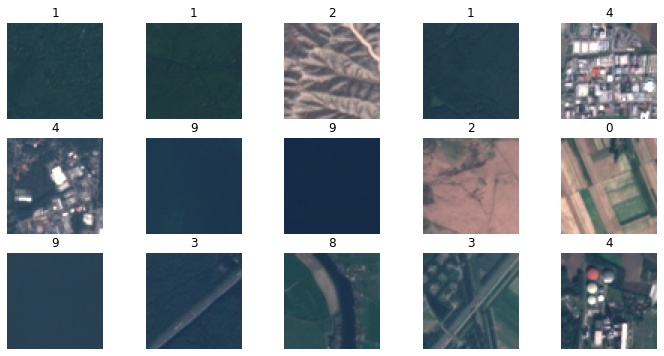

In [50]:
### Passo 1 - carregar e preparar dados
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

import tensorflow_datasets as tfds

train_ds, = tfds.load(
    "eurosat",
    split=["train[0%:30%]"],
    as_supervised=True
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# redimensionando exemplos e normalizando entre 0-1 tipo float32
img_size = (64, 64)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

input_shape = img_size+(3,)

batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)

plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(train_ds.take(15)):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image[i])
    plt.title(str(label[i].numpy()))
    plt.axis("off")

In [ ]:
### Passo 2 - carregar modelo pré-treinado e montar modelo extrator

Carregue um modelo ResNet50 pré-treinado na ImageNet sem utilizar o topo da rede.ok <br>
Crie um modelo extrator de características incluindo a ResNet50 carregada seguida de uma camada de Global Average Pooling para realizar extração de 2048 características da base de dados.

In [57]:
# carrega um modelo DenseNet121 pré-treinado na ImageNet
base_model = keras.applications.ResNet50(
    input_shape=input_shape,
    weights="imagenet",
    include_top=False,
)

In [60]:
# conectar a última camada de número -1 desse modelo a uma camada de
# Global Average Pooling para realizar extração de características da base de dados
# obtemos a camada de saída do modelo carregado (obtendo a camada -1)
base_output = base_model.layers[-1].output

# camada extratora incluindo a ResNet50
feat_layer = keras.layers.GlobalAveragePooling2D()(base_output)

# montamos um novo modelo com a entrada do modelo pré-treinado, e saída criada acima
model_features = keras.models.Model(base_model.inputs, feat_layer)
model_features.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
### Passo 3 - Obter características para o conjunto de treinamento e o conjunto de validação

Obtenha um array com as características extraídas a partir do modelo extrator criado no passo anterior

In [61]:
# passando os exemplos de treinamento pela rede sem treinamento
# o "predict" vai nos dar a saída programada, obtida da GlobalAveragePooling2D
features_train = np.array(model_features.predict(train_ds))

print('\tDados x features obtidas treinamento: ', features_train.shape)

	Dados x features obtidas treinamento:  (8100, 2048)


In [ ]:
### Passo 4 - Ajustar PCA com 16 componentes e obter a porcentagem da variância explicada por meio do explained_variance_ratio_

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca.fit(features_train)

dados_pca = pca.transform(features_train)
print('\tDados x features obtidas após PCA: ', dados_pca.shape)

	Dados x features obtidas após PCA:  (8100, 16)


In [64]:
pca.explained_variance_ratio_

array([0.33823994, 0.24301319, 0.07472507, 0.05299698, 0.03535778,
       0.0322272 , 0.02239338, 0.02177209, 0.01873743, 0.01450324,
       0.01319396, 0.01186925, 0.01041577, 0.00810956, 0.00683807,
       0.00618872], dtype=float32)

In [65]:
pca.explained_variance_ratio_.sum()

0.9105817